<a href="https://colab.research.google.com/github/tutorials101/micrograd/blob/main/micrograd_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<> Micrograd Engine Re-Implementation; I'm gonna call it **Scalargrad** instead. You may ask why? I mean why not...? lol

This is my effort to learn and improve my coding skills

ref: https://youtu.be/VMj-3S1tku0?si=yOYgVsaueCvW9oDB

In [67]:
# computational graph visualization
from graphviz import Digraph

def trace(node):

  nodes, edges = set(), set()

  def parse(node):
    if node not in nodes:
      nodes.add(node)

    for parent in node.parents:
      if (parent, node) not in edges:
        edges.add((parent, node))
      parse(parent)

  parse(node)

  return nodes, edges

def draw_graph(node):

  dot = Digraph(graph_attr={'rankdir':'LR'})
  nodes, edges = trace(node)

  for node in nodes:
    dot.node(name=str(id(node)), label="{ data=%.2f | grad=%.2f }" % (node.data, node.grad), shape='record')
    if node.operator:
      dot.node(name=str(id(node))+node.operator, label=node.operator)
      dot.edge(str(id(node))+node.operator, str(id(node)))


  for (node1, node2) in edges:
    dot.edge(str(id(node1)), str(id(node2))+node2.operator)


  return dot





In [68]:
# building blocks
class Scalar:

  def __init__(self, data, parents=(), operator=''):
    self.data = data
    self.grad = 0.0
    self.parents = parents
    self.operator = operator

  def __repr__(self):
    return f"Scalar(data={self.data:0.2f}, grad={self.grad:0.2f})"

  #scalar operations
  def __add__(self, other):

    if not isinstance(other, Scalar):
      other = Scalar(other)
    return Scalar(self.data + other.data, parents=(self, other), operator='+')

  def __radd__(self, other):
    return self + other

  # def __neg__(self, other):
  #   return Scalar(-self.data, parents=(self,), operator='-')

  # def __sub__(self, other):
  #   return self + (-other)

  # def __rsub__(self, other):
  #   return (-self) + other



Computational Graph Visualization Util



In [69]:
a = Scalar(5)


In [71]:
c = a+3

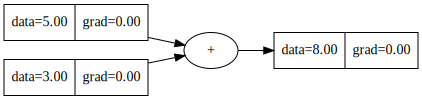

In [72]:
draw_graph(c)

In [ ]:
a = Scalar(5)
b = Scalar(7)

c = a+b

d = 9 + c + 12

In [ ]:
draw_graph(d)

In [ ]:
a=3.55
print("a=%.4f"%(a))#{a:.4f}")

In [ ]:
c